# How the Program works

- Create the blank plot
- Plot 4 randomized horizonatal and vertical lines crossing the graph, with each line protrouding from every side
    - Lines made using two points, (x1, y1) and (x2, y2)
    - Create a random percentage of lines that terminate at an intersecting line rather than the endpoint (to implement later)
- Create rectangle using the intersecting points of the 4 lines
    - Done through rectangle class
    - Fill in rectangle with color (randomly selected from red, blue, yellow, white, black(?))
- Repeat steps 2 and 3 for a number of times (taken from input) 

Welcome to the Mondrian-like art generator. 
 You have two options:
 1) Generate a standard image. 
 2) Customize your image. 
 Choose an option from 1 or 2. Or type "Exit" to exit: 1


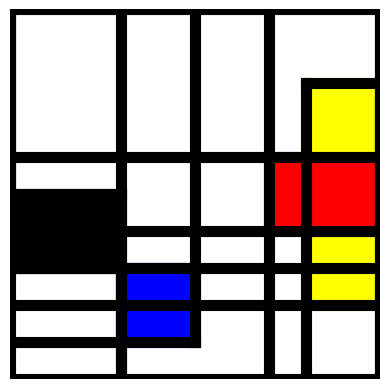

In [179]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random

# Creating Lines
class Line:
    def __init__(self):
        self.x1 = 0
        self.y1 = 0
        self.x2 = 0
        self.y2 = 0
    
    def vertical_line(self):
        self.x1 = random.randint(0, 10)
        self.y1 = 0
        self.x2 = self.x1
        self.y2 = self.y1 + 10

    def horizontal_line(self):
        self.x1 = 0
        self.y1 = random.randint(0, 10)
        self.x2 = self.x1 + 10
        self.y2 = self.y1

#Creating Rectangle

class Rect:
    #initializing the coordinates
    def __init__(self, x1, y1, x2, y2, x3, y3, x4, y4):
        self.x1 = min(x1, x2, x3, x4)
        self.y1 = min(y1, y2, y3, y4)
        self.x2 = max(x1, x2, x3, x4)
        self.y2 = max(y1, y2, y3, y4)
        self.x3 = x1
        self.y3 = y1
        self.x4 = x2
        self.y4 = y2
    
    #plotting the rectangle
    def fill_color(self):
        color_list = ['blue', 'yellow', 'red', 'black']
        color = color_list[i]
        axes.add_patch(plt.Rectangle((self.x1, self.y1), (self.x2-self.x1),(self.y2-self.y1),
             edgecolor = color,
             facecolor = color,
             alpha = 1,
             fill=True,
             lw=8))

####################################      SCRIPT     #######################################################              
#Beginning of response program        
response = ''
while response != "Exit" or response != "exit":
    response = input("Welcome to the Mondrian-like art generator. \n You have two options:\n 1) Generate a standard image. \n 2) Customize your image. \n Choose an option from 1 or 2. Or type \"Exit\" to exit: ")
    if response == '1': #STANDARD GENERATION
        fig, axes = plt.subplots()
        axes.set_aspect(1)
        axes.set_xlim(0, 10)
        axes.set_ylim(0, 10)
        rect_list = [] 
        trials = 4
        for i in range(trials):
            line1 = Line()
            line2 = Line()
            line3 = Line()
            line4 = Line()
            conditions_met = False
            while conditions_met == False: 
                line1.vertical_line()
                line2.horizontal_line()
                line3.vertical_line()
                line4.horizontal_line()
                width = max(line1.x1, line3.x1) - min(line1.x1, line3.x1)
                length = max(line2.y1, line4.y1) - min(line2.y1, line4.y1)

                #conditions checking

                if width * length <= 26: #Keep the rectangles small
                    condition1 = True
                else:
                    condition1 = False
                if line3.x1 != line1.x1: #Making sure the two lines are not the same
                    condition2 = True
                else:
                    condition2 = False
                if line4.y1 != line1.y1: #Making sure the two lines are not the same
                    condition3 = True
                else:
                    condition3 = False
                if condition1 == True and condition2 == True and condition3 == True:
                    conditions_met = True

            horizontal_list = [line2, line4]
            vertical_list = [line1, line3]

            for item in horizontal_list: #Cutting the lines short randomly
                randomchance = random.randint(0,2)
                if randomchance == 1:
                    item.x2 = max(line1.x1, line3.x1)
                elif randomchance == 2:
                    item.x1 = min(line1.x1, line3.x1)
                first_coord = [item.x1, item.x2]
                second_coord = [item.y1, item.y2]
                plt.plot(first_coord, second_coord, c='black', lw = 8) #Plotting the lines

            for item in vertical_list: #Cutting the lines short randomly
                randomchance = random.randint(0,2)
                if randomchance == 1:
                    item.y2 = max(line2.y1, line4.y1)
                elif randomchance == 2:
                    item.y1 = min(line2.y1, line4.y1)
                first_coord = [item.x1, item.x2]
                second_coord = [item.y1, item.y2]
                plt.plot(first_coord, second_coord, c='black', lw = 8) #Plotting the lines

            #Create rectangle and fill with color   
            rectangle = Rect(line1.x1, line2.y1, line3.x1, line2.y2, line1.x2, line4.y1, line3.x2, line4.y2)
            rectangle.fill_color() 

        #Border lines of plot
        plt.plot((0, 0), (0, 10), c='black', lw = 8)
        plt.plot((0, 10), (0, 0), c='black', lw = 8)
        plt.plot((10, 10), (0, 10), c='black', lw = 8)
        plt.plot((0, 10), (10, 10), c='black', lw = 8)
        plt.axis('off')
        plt.show()
        break
        
        
    elif response == '2':
        fig, axes = plt.subplots()
        axes.set_aspect(1)
        axes.set_xlim(0, 10)
        axes.set_ylim(0, 10)
        
        your_list = [] #Initializes a color bank of the user's choice
        choice = ''
        while choice != "Stop":
            choice = input("Add a color to your palette! Type \"Stop\" to finish your list: ")
            if choice == "Stop" or choice == "stop":
                break
            your_list.append(choice)
        
        trials = int(input("How many rectangles?: "))
        size_limit = int(input("Set a rectangle area size limit (The smaller the better):"))
        
        class Rect:
            #initializing the coordinates
            def __init__(self, x1, y1, x2, y2, x3, y3, x4, y4):
                self.x1 = min(x1, x2, x3, x4)
                self.y1 = min(y1, y2, y3, y4)
                self.x2 = max(x1, x2, x3, x4)
                self.y2 = max(y1, y2, y3, y4)
                self.x3 = x1
                self.y3 = y1
                self.x4 = x2
                self.y4 = y2

            #plotting the rectangle

            def fill_color(self, i):
                color_list = your_list[:] #Recreating the fill_color() function to incoroporate user choice
                if len(color_list)-1 < i: 
                    color = color_list[i % len(color_list)]
                elif len(color_list)-1 == i or len(color_list)-1 > i:
                    color = color_list[i]
                axes.add_patch(plt.Rectangle((self.x1, self.y1), (self.x2-self.x1),(self.y2-self.y1),
                     edgecolor = color,
                     facecolor = color,
                     alpha = 1,
                     fill=True,
                     lw=8))
        
        rect_list = []
        for i in range(trials):
            line1 = Line()
            line2 = Line()
            line3 = Line()
            line4 = Line()
            conditions_met = False
            while conditions_met == False:
                line1.vertical_line()
                line2.horizontal_line()
                line3.vertical_line()
                line4.horizontal_line()
                width = max(line1.x1, line3.x1) - min(line1.x1, line3.x1)
                length = max(line2.y1, line4.y1) - min(line2.y1, line4.y1)

                #conditions checking

                if width * length <= size_limit: #Keep the rectangles small
                    condition1 = True
                else:
                    condition1 = False
                if line3.x1 != line1.x1:
                    condition2 = True
                else:
                    condition2 = False
                if line4.y1 != line1.y1:
                    condition3 = True
                else:
                    condition3 = False
                if condition1 == True and condition2 == True and condition3 == True:
                    conditions_met = True

            horizontal_list = [line2, line4]
            vertical_list = [line1, line3]

            for item in horizontal_list: #Cutting the lines short randomly
                randomchance = random.randint(0,2)
                if randomchance == 1:
                    item.x2 = max(line1.x1, line3.x1)
                elif randomchance == 2:
                    item.x1 = min(line1.x1, line3.x1)
                first_coord = [item.x1, item.x2]
                second_coord = [item.y1, item.y2]
                plt.plot(first_coord, second_coord, c='black', lw = 8) #Plotting the lines

            for item in vertical_list: #Cutting the lines short randomly
                randomchance = random.randint(0,2)
                if randomchance == 1:
                    item.y2 = max(line2.y1, line4.y1)
                elif randomchance == 2:
                    item.y1 = min(line2.y1, line4.y1)
                first_coord = [item.x1, item.x2]
                second_coord = [item.y1, item.y2]
                plt.plot(first_coord, second_coord, c='black', lw = 8) #Plotting the lines

            i = Rect(line1.x1, line2.y1, line3.x1, line2.y2, line1.x2, line4.y1, line3.x2, line4.y2)
            rect_list.append(i) #Adds rectangles to a list
                
            for index, item in enumerate(rect_list): 
                item.fill_color(index) #Each rectangle in list is filled with color

        #Lines of plot
        plt.plot((0, 0), (0, 10), c='black', lw = 8)
        plt.plot((0, 10), (0, 0), c='black', lw = 8)
        plt.plot((10, 10), (0, 10), c='black', lw = 8)
        plt.plot((0, 10), (10, 10), c='black', lw = 8)
        plt.axis('off')
        plt.show()
        break
        
    elif response == 'Exit' or response == 'exit':
        break
        